# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Police Violence Investigation

### Initial Exploratory Data Analysis

**Harvard University**<br/>
**Fall 2020**<br/>
**Data Scientist**: Matthew Parker

<hr style="height:2pt">



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<hr style="height:2pt">

## README

### Layout
#### Section 1: Look at mapping police data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 2: Look at Wapo data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 3: Make some Plots

* Goals
    * Start to generate plots
    
    
#### Section 4: Initial look at models

* Goals
    * Now that the data is understood, take a look at initial models
    * Try a few options and review for feasibility and utility
    
    

## Contents
- [Section 1: Looking at Mapping Police Violence Dataset](#Section-1:-Looking-at-Mapping-Police-Violence-Dataset) 
- [Section 2: Now look at Washington Post Data](#Section-2:-Now-look-at-Washington-Post-Data) 
- [Section 3: Make some Plots!](#Section-3:-Make-some-Plots!)
- [Section 4: Initial Look at Models](#Section-4:-Initial-Look-at-Models)
- [Section 5: Appendix](#Section-5:-Appendix)

<hr style="height:2pt">



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [3]:
# Load data
data_mapping = pd.read_csv('data/mapping-police-violence-24oct2020.csv')
data_wapo = pd.read_csv('data/fatal-police-shootings-data-wsp.csv')

print(f"{len(data_mapping)} mapping police violence samples")
print(f"{len(data_wapo)} Washington Post Fatal Police Shootings samples")
print("\nMapping Columns:")
print(', '.join(data_mapping.columns))
print("\nWaPo Fatal Shootings Columns:")
print(', '.join(data_wapo.columns))

8507 mapping police violence samples
5716 Washington Post Fatal Police Shootings samples

Mapping Columns:
Victim's name, Victim's age, Victim's gender, Victim's race, URL of image of victim, Date of Incident (month/day/year), Street Address of Incident, City, State, Zipcode, County, Agency responsible for death, ORI Agency Identifier (if available), Cause of death, A brief description of the circumstances surrounding the death, Official disposition of death (justified or other), Criminal Charges?, Link to news article or photo of official document, Symptoms of mental illness?, Unarmed/Did Not Have an Actual Weapon, Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database), Alleged Threat Level (Source: WaPo), Fleeing (Source: WaPo), Body Camera (Source: WaPo), WaPo ID (If included in WaPo database), Off-Duty Killing?, Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rura

In [4]:
display(data_mapping.head())
display(data_mapping.describe())

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,NaN,Male,NaN,NaN,10/14/2020,NaN,Cookson,OK,NaN,Cherokee,Cherokee County Sheriff's Department,OK0110000,"Gunshot, Taser",A deputy responded to a disturbance called aro...,Pending investigation,No known charges,https://www.newson6.com/story/5f87912629c6bb05...,No,Allegedly Armed,spear,attack,Not fleeing,No,6232.0,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,NaN,NaN,10/14/2020,NaN,South Los Angeles,CA,NaN,Los Angeles,Los Angeles Police Department,CA0194200,Gunshot,Around 9:50PM officers were driving by the 76 ...,Pending investigation,No known charges,https://ktla.com/news/local-news/lapd-suspect-...,No,Allegedly Armed,gun,attack,Not fleeing,No,6231.0,NaN,NaN,NaN,NaN
2,Name withheld by police,NaN,Male,White,NaN,10/14/2020,NaN,Chico,CA,NaN,Butte,Chico Police Department,CA0040200,Gunshot,A man who reportedly brandished a knife and th...,Pending investigation,No known charges,https://www.chicoer.com/2020/10/15/chico-polic...,No,Allegedly Armed,knife,attack,foot,No,6230.0,NaN,NaN,NaN,NaN
3,Marcos Ramirez,27,Male,Hispanic,NaN,10/13/2020,NaN,Bakersfield,CA,NaN,Kern,Bakersfield Police Department,CA0150200,Gunshot,Bakersfield police shot and killed a man they ...,Pending investigation,No known charges,https://www.turnto23.com/news/crime/bpd-invest...,No,Allegedly Armed,knife,attack,foot,Yes,6228.0,NaN,NaN,NaN,NaN
4,Anthony Jones,24,Male,NaN,NaN,10/12/2020,NaN,Bethel Springs,TN,NaN,McNairy,NaN,NaN,Gunshot,Jones was shot in McNairy County after police ...,Pending investigation,No known charges,https://www.wkrn.com/news/tennessee-news/tenne...,No,Unarmed/Did Not Have an Actual Weapon,no object,other,car,No,6229.0,NaN,NaN,NaN,NaN


,Zipcode,WaPo ID (If included in WaPo database),MPV ID,Fatal Encounters ID
count,8465.000000,5592.000000,8485.000000,8417.000000
mean,60584.679622,3116.519134,4261.408721,20024.425686
std,28088.279417,1765.307092,2454.204918,5196.315249
min,1085.000000,3.000000,1.000000,350.000000
25%,33525.000000,1591.750000,2139.000000,15550.000000
50%,67203.000000,3111.500000,4262.000000,18525.000000
75%,85756.000000,4639.250000,6386.000000,25052.000000
max,99801.000000,6232.000000,8511.000000,28933.000000


### <div class='exercise'><b>Section 1: Looking at Mapping Police Violence Dataset</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>
    

    
</div>

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race', 'URL of image of victim', 'Date of Incident (month/day/year)', 'Street Address of Incident', 'City', 'State', 'Zipcode', 'County', 'Agency responsible for death', 'ORI Agency Identifier (if available)', 'Cause of death', 'A brief description of the circumstances surrounding the death', 'Official disposition of death (justified or other)', 'Criminal Charges?', 'Link to news article or photo of official document', 'Symptoms of mental illness?', 'Unarmed/Did Not Have an Actual Weapon', 'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)', 'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)', 'Off-Duty Killing?', 'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )', 'MPV ID', 'Fatal Enco

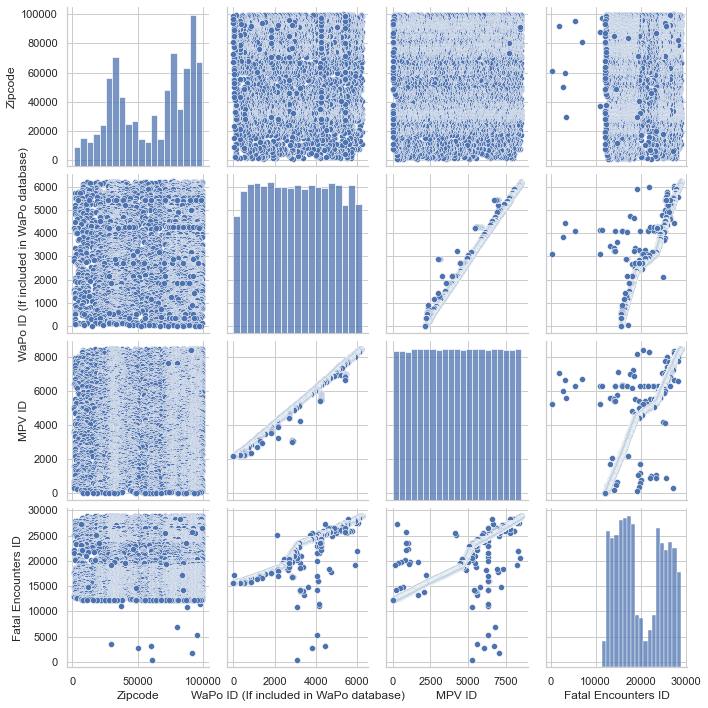

In [5]:
display(data_mapping.columns)
sns.pairplot(data=data_mapping)


In [6]:
data_mapping.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 29 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Victim's name                                                                                                                                                               8507 non-null   object 
 1   Victim's age                                                                                                                                                                8492 non-null   object 
 2   Victim's gender                                                                     

In [7]:
# do we have any null values?

data_mapping.isnull().values.any()

# where are they?

for col in data_mapping.columns:
    null_count = data_mapping[col].isnull().sum()
    print(col, ": ", null_count)

Victim's name :  0
Victim's age :  15
Victim's gender :  13
Victim's race :  4
URL of image of victim :  3939
Date of Incident (month/day/year) :  0
Street Address of Incident :  95
City :  6
State :  0
Zipcode :  42
County :  14
Agency responsible for death :  16
ORI Agency Identifier (if available) :  2
Cause of death :  0
A brief description of the circumstances surrounding the death :  17
Official disposition of death (justified or other) :  11
Criminal Charges? :  0
Link to news article or photo of official document :  11
Symptoms of mental illness? :  11
Unarmed/Did Not Have an Actual Weapon :  0
Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database) :  2
Alleged Threat Level (Source: WaPo) :  2451
Fleeing (Source: WaPo) :  2893
Body Camera (Source: WaPo) :  2996
WaPo ID (If included in WaPo database) :  2915
Off-Duty Killing? :  8268
Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full

In [8]:
# drop some of the columns which have too many N/A or don't really help us

# not used and lots of missing
df1 = data_mapping.drop('URL of image of victim', axis=1)

# almost all NaN
df1 = df1.drop('Off-Duty Killing?', axis=1)

# not really used
df1 = df1.drop(['Street Address of Incident',
                'A brief description of the circumstances surrounding the death',
                "Victim's name",
                'Link to news article or photo of official document',
                'ORI Agency Identifier (if available)'],
                axis=1)

# rename a few annoying columns
df1.rename(columns={'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )':'geography'}, inplace=True)
df1.rename(columns={'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)':'Alleged Weapon'}, inplace=True)


Now see what needs further cleaning

In [9]:
for col in df1.columns:
    display(df1[col].value_counts())

25         279
31         275
Unknown    268
27         268
28         266
          ... 
10           1
88           1
91           1
95           1
93           1
Name: Victim's age, Length: 88, dtype: int64

Male           8055
Female          425
Transgender       9
Unknown           4
Male              1
Name: Victim's gender, dtype: int64

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

6/16/2013     10
12/26/2017     9
6/8/2013       9
5/3/2020       9
2/1/2018       9
              ..
9/14/2016      1
9/6/2019       1
7/8/2019       1
9/14/2017      1
6/2/2019       1
Name: Date of Incident (month/day/year), Length: 2675, dtype: int64

Phoenix         121
Los Angeles     121
Houston         109
Chicago          84
San Antonio      66
               ... 
Sunman            1
South Fulton      1
Ardsley           1
Moraine           1
Deptford          1
Name: City, Length: 3102, dtype: int64

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
NC     236
OK     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
SC     133
MI     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
HI      39
NE      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

88001.0    11
93307.0    10
90044.0    10
87121.0    10
85009.0    10
           ..
30428.0     1
78942.0     1
67132.0     1
85085.0     1
37888.0     1
Name: Zipcode, Length: 5329, dtype: int64

Los Angeles      361
Maricopa         231
Harris           136
Jefferson        124
Orange           123
                ... 
Clackamus          1
McLean             1
Prince Edward      1
Juneau             1
Lynn               1
Name: County, Length: 1152, dtype: int64

Los Angeles Police Department                                        132
Phoenix Police Department                                            116
Los Angeles County Sheriff's Department                              101
Chicago Police Department                                             81
New York Police Department                                            79
                                                                    ... 
Webster Groves Police Department                                       1
Jerome County Sheriff's Office                                         1
Emerson Police Department                                              1
Bernalillo County Sheriff's Office, Albuquerque Police Department      1
Metro Transit Police                                                   1
Name: Agency responsible for death, Length: 3091, dtype: int64

Gunshot                                    7833
Gunshot, Taser                              253
Taser                                       247
Vehicle                                      44
Beaten                                       31
Physical Restraint                           25
Tasered                                      18
Asphyxiated                                   9
Physical restraint                            9
Gunshot, Police Dog                           5
Other                                         5
Gunshot, Pepper Spray                         4
Pepper Spray                                  4
Bean bag                                      2
Taser, Physical Restraint                     2
Baton, Pepper Spray, Physical Restraint       1
Taser, Pepper spray, beaten                   1
Beaten/Bludgeoned with instrument             1
Gunshot, Beanbag Gun                          1
Gunshot, Taser, Pepper spray                  1
Gunshot, Taser, Beanbag Shotgun         

Pending investigation/No Known Charges                                            4862
Unreported                                                                        1225
Justified                                                                          651
Pending investigation                                                              446
Justified by District Attorney                                                     350
                                                                                  ... 
Charged, Convicted of involuntary manslaughter, Sentenced to 5 years in Prison       1
Charged with involuntary manslaughter, Acquitted                                     1
Charged with 3rd degree murder                                                       1
Charged, Convicted of second-degree murder, Sentenced to 20 years in prison          1
Justified by County Prosecutor's Office                                              1
Name: Official disposition of death (justif

No known charges                                                                 8361
Charged with a crime                                                               69
Charged, Acquitted                                                                 29
Charged, Mistrial                                                                   6
Charged, Charges Dropped                                                            5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 3 months in jail                                   1
Charged, Convicted, Sentenced to 16 years in prison                                 1
Charged, Convicted, Sentenced to 1 year in prison and 

No                     5415
Yes                    1598
Unknown                1162
Drug or alcohol use     318
unknown                   1
Unkown                    1
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

gun                    4432
knife                  1129
no object               888
undetermined            532
vehicle                 499
                       ... 
hockey stick              1
pole and knife            1
hammer and knife          1
car, knife and mace       1
lighter                   1
Name: Alleged Weapon, Length: 170, dtype: int64

attack          3922
other           1802
undetermined     331
Other              1
Name: Alleged Threat Level (Source: WaPo), dtype: int64

Not fleeing    3757
Car             930
Foot            728
Other           173
not fleeing       8
car               7
Not Fleeing       5
foot              4
other             2
Name: Fleeing (Source: WaPo), dtype: int64

No                    4889
Yes                    592
no                      16
Surveillance Video       5
Bystander Video          4
Surveillance video       2
Dashcam Video            2
Dashcam video            1
Name: Body Camera (Source: WaPo), dtype: int64

3232.0    2
3784.0    2
6117.0    2
3516.0    2
4731.0    1
         ..
6020.0    1
4650.0    1
3766.0    1
3226.0    1
6144.0    1
Name: WaPo ID (If included in WaPo database), Length: 5588, dtype: int64

Suburban        4240
Urban           2287
Rural           1899
Undetermined      73
Name: geography, dtype: int64

5972.0    2
4603.0    1
4629.0    1
497.0     1
590.0     1
         ..
2906.0    1
2268.0    1
2129.0    1
1794.0    1
8448.0    1
Name: MPV ID, Length: 8484, dtype: int64

28926.0    2
24323.0    2
28921.0    2
28920.0    2
20232.0    1
          ..
25960.0    1
14498.0    1
17377.0    1
14854.0    1
28160.0    1
Name: Fatal Encounters ID, Length: 8413, dtype: int64

In [10]:
# fix a few of the duplicate groupings

df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('unknown', 'Unknown')
df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('Unkown', 'Unknown')

df1['Alleged Threat Level (Source: WaPo)'] = df1['Alleged Threat Level (Source: WaPo)'].str.replace('Other', 'other')

df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('other', 'Other')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('not fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('Not Fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('foot', 'Foot')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('car', 'Car')

df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('no', 'No')
df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('Dashcam video', 'Dashcam Video')


Taking a look at the victim's race

In [11]:
data_mapping["Victim's race"].value_counts()

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

Where are most of the events taking place?


In [12]:
display(df1["State"].value_counts())
display(df1["City"].value_counts())

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
NC     236
OK     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
SC     133
MI     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
HI      39
NE      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

Phoenix         121
Los Angeles     121
Houston         109
Chicago          84
San Antonio      66
               ... 
Sunman            1
South Fulton      1
Ardsley           1
Moraine           1
Deptford          1
Name: City, Length: 3102, dtype: int64

In [13]:
# your code here



In [14]:
# your code here 

df1['Cause of death'].value_counts()

Gunshot                                    7833
Gunshot, Taser                              253
Taser                                       247
Vehicle                                      44
Beaten                                       31
Physical Restraint                           25
Tasered                                      18
Asphyxiated                                   9
Physical restraint                            9
Gunshot, Police Dog                           5
Other                                         5
Gunshot, Pepper Spray                         4
Pepper Spray                                  4
Bean bag                                      2
Taser, Physical Restraint                     2
Baton, Pepper Spray, Physical Restraint       1
Taser, Pepper spray, beaten                   1
Beaten/Bludgeoned with instrument             1
Gunshot, Beanbag Gun                          1
Gunshot, Taser, Pepper spray                  1
Gunshot, Taser, Beanbag Shotgun         

In [15]:
display(df1["Criminal Charges?"].value_counts())

No known charges                                                                 8361
Charged with a crime                                                               69
Charged, Acquitted                                                                 29
Charged, Mistrial                                                                   6
Charged, Charges Dropped                                                            5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 3 months in jail                                   1
Charged, Convicted, Sentenced to 16 years in prison                                 1
Charged, Convicted, Sentenced to 1 year in prison and 

In [16]:
display(df1["Symptoms of mental illness?"].value_counts())

No                     5415
Yes                    1598
Unknown                1164
Drug or alcohol use     318
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

In [17]:
display(df1["Unarmed/Did Not Have an Actual Weapon"].value_counts())

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

In [18]:
display(df1["Fleeing (Source: WaPo)"].value_counts())

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

In [19]:
display(df1["Body Camera (Source: WaPo)"].value_counts())

No                    4905
Yes                    592
Surveillance Video       5
Bystander Video          4
Dashcam Video            3
Surveillance video       2
Name: Body Camera (Source: WaPo), dtype: int64

Let's convert all the boolean predictors

In [20]:
# group all of the charges together for now
df1["Criminal Charges?_bool"]= df1["Criminal Charges?"].apply(lambda x: 0 if x=='No known charges' else 1)

# grouping all symptoms not classified as "yes"
df1["Symptoms of mental illness?_bool"]= df1["Symptoms of mental illness?"].apply(lambda x: 1 if x=='Yes' else 0)

# grouping all 'allegedly armed' as "yes" vs all other answers
df1["Unarmed/Did Not Have an Actual Weapon_bool"]= df1["Unarmed/Did Not Have an Actual Weapon"].apply(lambda x: 1 if x=='Allegedly Armed' else 0)

# grouping all spellings of 'not fleeing'
df1["Fleeing (Source: WaPo)_bool"]= df1["Fleeing (Source: WaPo)"].apply(lambda x: 0 if x in ['Not fleeing', 'not fleeing', 'Not Fleeing'] else 1)

# grouping all spellings of 'no'
df1["Body Camera (Source: WaPo)_bool"]= df1["Body Camera (Source: WaPo)"].apply(lambda x: 0 if x in ['No', 'no'] else 1)


In [21]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Victim's age                                        8492 non-null   object 
 1   Victim's gender                                     8494 non-null   object 
 2   Victim's race                                       8503 non-null   object 
 3   Date of Incident (month/day/year)                   8507 non-null   object 
 4   City                                                8501 non-null   object 
 5   State                                               8507 non-null   object 
 6   Zipcode                                             8465 non-null   float64
 7   County                                              8493 non-null   object 
 8   Agency responsible for death                        8491 non-null   object 
 9

None

Some of these datatypes still need to be recast

In [22]:
# Data type conversions

# age still has some odd values
# display(data_mapping["Victim's age"].head())
df1["Victim's age"] = data_mapping["Victim's age"].fillna(0)
print(df1["Victim's age"].str.isdigit().sum())
df1["Victim's age"]= df1["Victim's age"].apply(lambda x: x if str(x).isdigit() else 0).astype("int")


# drop a few more NaN
#df1 = df1.fillna(str(0))
df1.dropna()

# recast some of the string categories as type string
df1["Victim's gender"] = df1["Victim's gender"].astype('str')
df1["Victim's race"] = df1["Victim's race"].astype('str')
df1["City"] = df1["City"].astype('str')
df1["State"] = df1["State"].astype('str')
df1["County"] = df1["County"].astype('str')
df1["Agency responsible for death"] = df1["Agency responsible for death"].astype('str')
df1["Cause of death"] = df1["Cause of death"].astype('str')
df1["Official disposition of death (justified or other)"] = df1["Official disposition of death (justified or other)"].astype('str')
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].astype('str')
df1["Unarmed/Did Not Have an Actual Weapon"] = df1["Unarmed/Did Not Have an Actual Weapon"].astype('str')
df1["Alleged Weapon"] = df1["Alleged Weapon"].astype('str')
df1["Fleeing (Source: WaPo)"] = df1["Fleeing (Source: WaPo)"].astype('str')
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].astype('str')
df1["Alleged Threat Level (Source: WaPo)"] = df1["Alleged Threat Level (Source: WaPo)"].astype('str')
df1["geography"] = df1["geography"].astype('str')

# Add year
df1['year'] = pd.DatetimeIndex(df1['Date of Incident (month/day/year)']).year


8223


In [23]:
display(df1["Victim's gender"].value_counts())

Male           8055
Female          425
nan              13
Transgender       9
Unknown           4
Male              1
Name: Victim's gender, dtype: int64

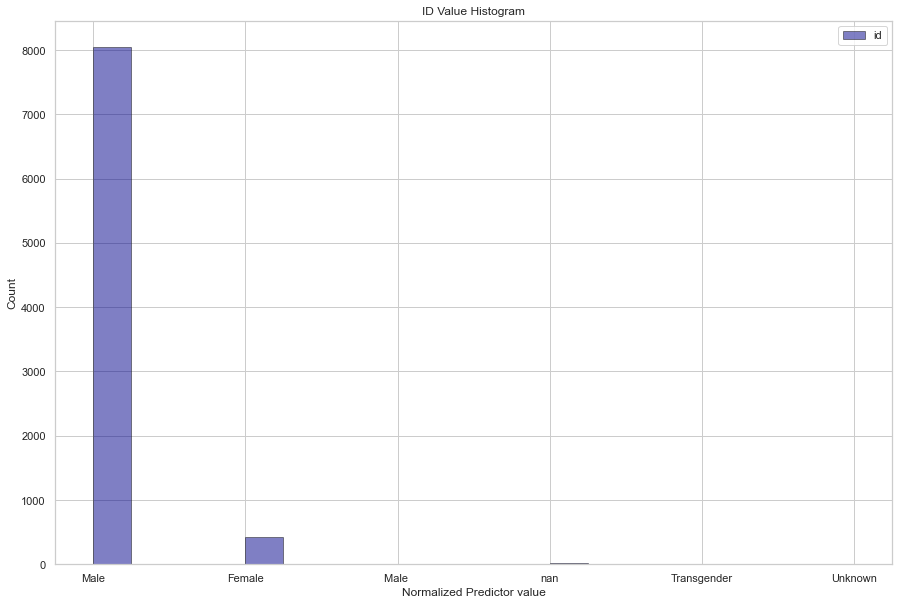

In [24]:
# check Data with histogram
fig = plt.figure(figsize=(15,10))

plt.hist(df1["Victim's gender"], bins=20, alpha = 0.5, edgecolor='k', label='id', color='darkblue')
plt.xlabel('Normalized Predictor value')
plt.ylabel('Count')
plt.title(f'ID Value Histogram')
plt.legend(loc = 'best')

Try to repeat the pairplot

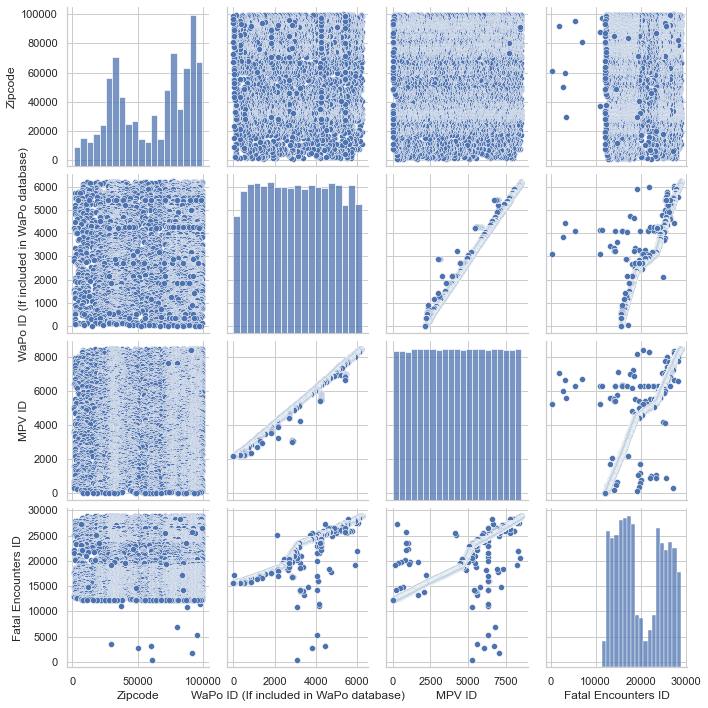

In [25]:
sns.pairplot(data=data_mapping)

In [26]:
# check Data with histogram

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40), edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
fontsize = 10

columns = df1.columns
# columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race", "Date of Incident (month/day/year)",
#           "Street Address of Incident", "City", "State", "Zipcode", "County", "Agency responsible for death", 
#           "ORI Agency Identifier (if available)", "Cause of death", 
#           "Official disposition of death (justified or other)", "Criminal Charges?", 
#           "Symptoms of mental illness?", "Unarmed/Did Not Have an Actual Weapon", 
#           "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)", 
#           "Alleged Threat Level (Source: WaPo)", "Fleeing (Source: WaPo)", "Body Camera (Source: WaPo)", 
#           "Off-Duty Killing?", "Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )", 
#           "MPV ID", "Fatal Encounters ID"]

# plot histograms
for i, col in enumerate(columns):
    print(col)
    axs[i].hist(df1[col], alpha=0.7, color='darkblue', bins='auto', density=False, histtype = 'bar', edgecolor='k')
    axs[i].set_title("Distribution of " + col, fontsize=fontsize)
    axs[i].set_xlabel(col + " Predictor", fontsize=fontsize)
    axs[i].set_ylabel('Count', fontsize=fontsize)
    
# removes the empty one, since we only have 14 flavors, not 15
axs[28].set_axis_off()
axs[29].set_axis_off()

plt.show()

Victim's age
Victim's gender
Victim's race
Date of Incident (month/day/year)
City
State
Zipcode
County
Agency responsible for death
Cause of death
Official disposition of death (justified or other)
Criminal Charges?
Symptoms of mental illness?
Unarmed/Did Not Have an Actual Weapon
Alleged Weapon
Alleged Threat Level (Source: WaPo)
Fleeing (Source: WaPo)
Body Camera (Source: WaPo)
WaPo ID (If included in WaPo database)
geography
MPV ID
Fatal Encounters ID
Criminal Charges?_bool
Symptoms of mental illness?_bool
Unarmed/Did Not Have an Actual Weapon_bool
Fleeing (Source: WaPo)_bool
Body Camera (Source: WaPo)_bool
year


KeyboardInterrupt: 

*Your answer here*  


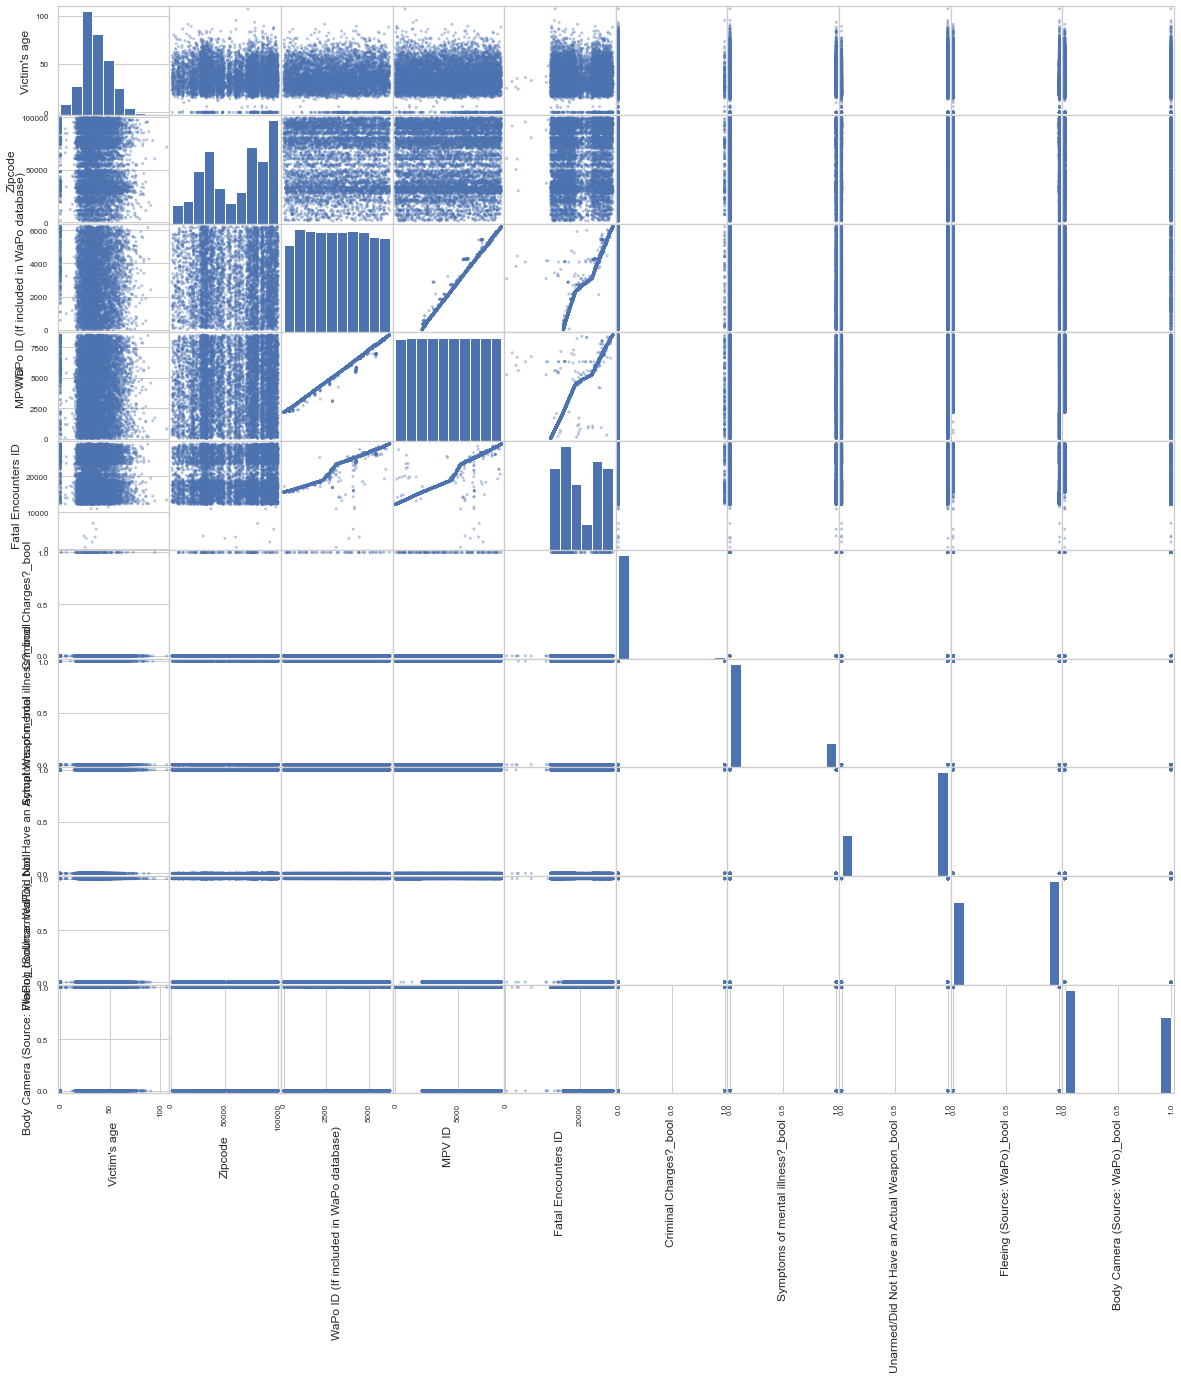

In [28]:
# check float features
grid_features = ["Victim's age", 'Zipcode', 'WaPo ID (If included in WaPo database)', 'MPV ID', 
                 'Fatal Encounters ID','Criminal Charges?_bool', 'Symptoms of mental illness?_bool',  
                 'Unarmed/Did Not Have an Actual Weapon_bool', 'Fleeing (Source: WaPo)_bool',
                 'Body Camera (Source: WaPo)_bool' ]

scatter = pd.plotting.scatter_matrix(df1[grid_features], alpha=0.4, figsize=(20,20));
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 90)

### <div class='exercise'><b>Section 2: Now look at Washington Post Data</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

    



</div>

In [40]:
display(data_wapo.head())
display(data_wapo.describe())

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


,id,age,longitude,latitude
count,5716.000000,5456.000000,5437.000000,5437.000000
mean,3173.216235,37.139113,-97.256366,36.650508
std,1789.492388,13.068117,16.629368,5.367021
min,3.000000,6.000000,-158.137000,19.498000
25%,1624.750000,27.000000,-112.134000,33.477000
50%,3174.500000,35.000000,-94.432000,36.100000
75%,4734.250000,46.000000,-83.066000,39.958000
max,6247.000000,91.000000,-68.014000,71.301000


In [41]:
display(data_wapo.columns)

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], dtype='object')

In [42]:
print('Dataset shape: ', data_wapo.shape)

data_wapo.info()

Dataset shape:  (5716, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5716 non-null   int64  
 1   name                     5499 non-null   object 
 2   date                     5716 non-null   object 
 3   manner_of_death          5716 non-null   object 
 4   armed                    5503 non-null   object 
 5   age                      5456 non-null   float64
 6   gender                   5715 non-null   object 
 7   race                     5109 non-null   object 
 8   city                     5716 non-null   object 
 9   state                    5716 non-null   object 
 10  signs_of_mental_illness  5716 non-null   bool   
 11  threat_level             5716 non-null   object 
 12  flee                     5426 non-null   object 
 13  body_camera              5716 non-null   bool   
 1

In [43]:
# do we have any null values?

data_wapo.isnull().values.any()

# where are they?

for col in data_wapo.columns:
    null_count = data_wapo[col].isnull().sum()
    print(col, ": ", null_count)

id :  0
name :  217
date :  0
manner_of_death :  0
armed :  213
age :  260
gender :  1
race :  607
city :  0
state :  0
signs_of_mental_illness :  0
threat_level :  0
flee :  290
body_camera :  0
longitude :  279
latitude :  279
is_geocoding_exact :  0


In [59]:
# drop some of the columns which have too many N/A or don't really help us

# not really used
df2 = data_wapo.drop('name', axis=1)

# almost all NaN
#df2 = df2.drop('Off-Duty Killing?', axis=1)


Index(['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], dtype='object')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


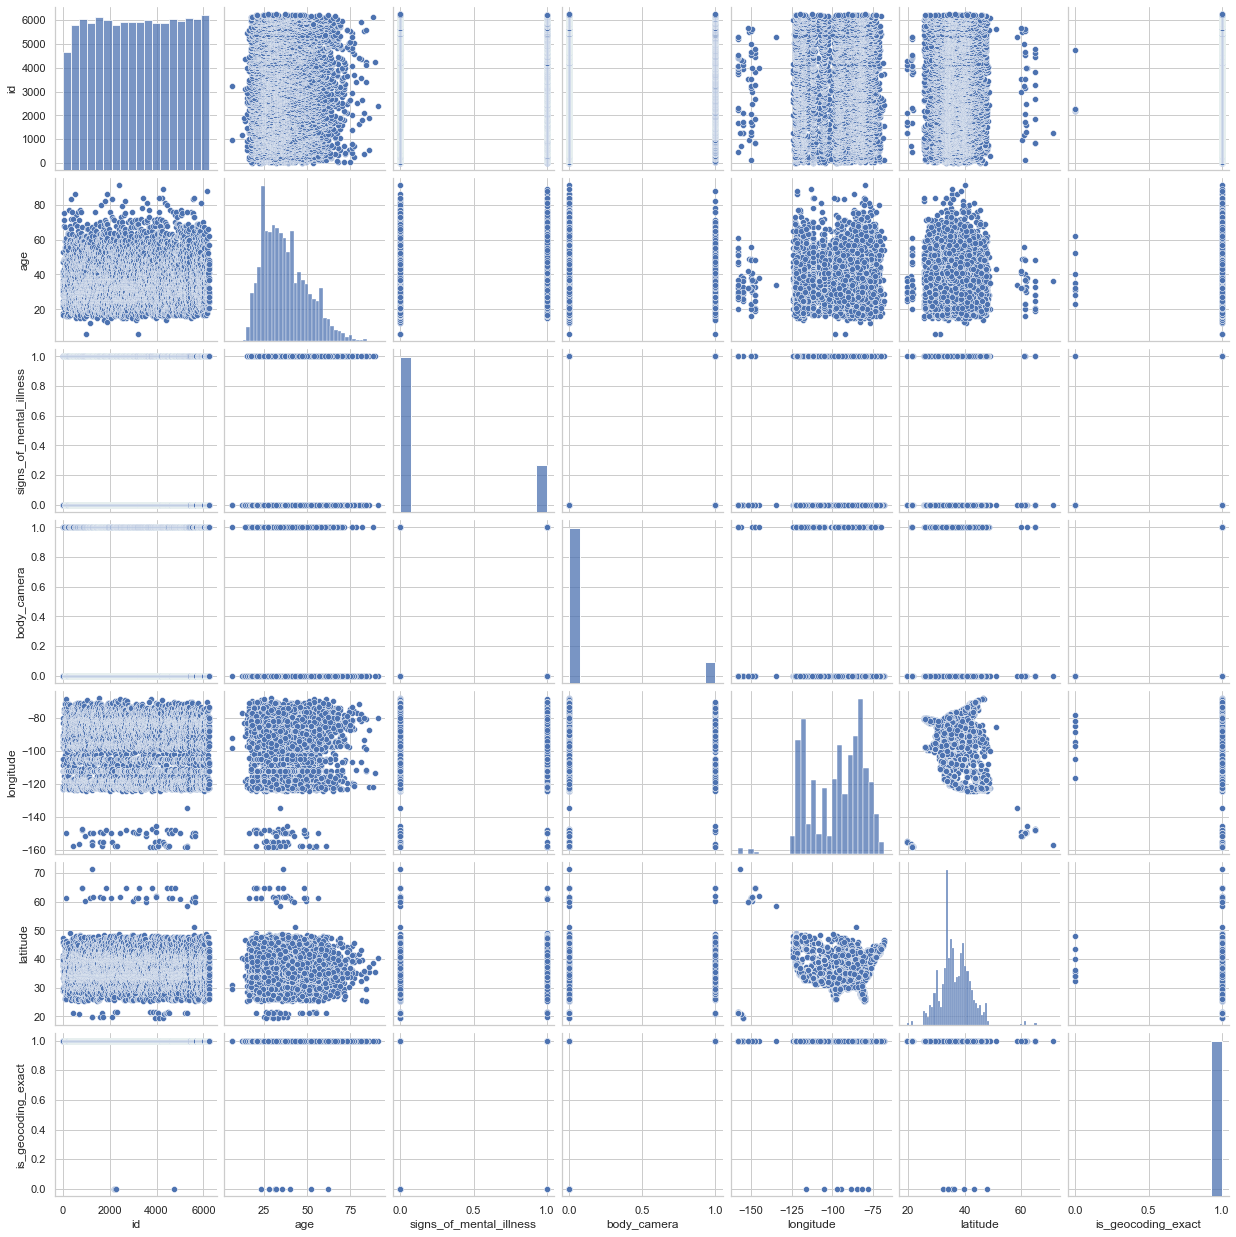

In [45]:
display(df2.columns)
sns.pairplot(data=df2)


In [ ]:
# your code here





Need to recast some of the object types as correct values

In [60]:
# Data type conversions
# df2['name'] = df2['name'].astype('category')
df2['manner_of_death'] = df2['manner_of_death'].astype('category')
df2['armed'] = df2['armed'].astype('str')
df2['gender'] = df2['gender'].astype('str')
df2['race'] = df2['race'].astype('str')
df2['city'] = df2['state'].astype('str')
df2['threat_level'] = df2['threat_level'].astype('str')
df2['flee'] = df2['flee'].astype('str')
df2['signs_of_mental_illness'] = df2['signs_of_mental_illness'].astype('int')
df2['body_camera'] = df2['body_camera'].astype('str')
df2['is_geocoding_exact'] = df2['is_geocoding_exact'].astype('str')


# check again
df2.dtypes

id                            int64
date                         object
manner_of_death            category
armed                        object
age                         float64
gender                       object
race                         object
city                         object
state                        object
signs_of_mental_illness       int64
threat_level                 object
flee                         object
body_camera                  object
longitude                   float64
latitude                    float64
is_geocoding_exact           object
dtype: object

Check on types of answers for each column

In [47]:
# your code here

for col in df2.columns:
    display(df2[col].value_counts())

2047    1
689     1
661     1
4759    1
2712    1
       ..
3431    1
5480    1
1386    1
3435    1
2049    1
Name: id, Length: 5716, dtype: int64

2018-06-29    9
2019-01-28    9
2020-05-26    9
2018-04-01    9
2018-02-01    9
             ..
2018-01-13    1
2015-06-01    1
2016-05-13    1
2015-11-21    1
2020-06-21    1
Name: date, Length: 1962, dtype: int64

shot                5427
shot and Tasered     289
Name: manner_of_death, dtype: int64

gun                    3252
knife                   846
unarmed                 359
nan                     213
toy weapon              193
                       ... 
car, knife and mace       1
machete and gun           1
ice pick                  1
carjack                   1
gun and sword             1
Name: armed, Length: 96, dtype: int64

31.0    195
25.0    189
27.0    183
32.0    177
33.0    177
       ... 
79.0      1
89.0      1
91.0      1
12.0      1
78.0      1
Name: age, Length: 78, dtype: int64

M      5463
F       252
nan       1
Name: gender, dtype: int64

W      2595
B      1345
H       947
nan     607
A        94
N        81
O        47
Name: race, dtype: int64

CA    853
TX    506
FL    379
AZ    262
CO    209
GA    197
OK    171
NC    168
WA    163
OH    159
TN    149
MO    146
LA    116
PA    113
NM    112
IL    109
AL    105
NY    105
NV    104
KY    103
IN    101
VA     97
WI     96
SC     93
OR     87
MI     86
AR     84
MD     81
NJ     71
UT     70
MS     67
MN     64
WV     56
KS     52
ID     43
AK     40
IA     36
MA     35
MT     34
HI     30
NE     25
ME     22
CT     21
SD     17
DC     14
WY     14
NH     13
DE     13
ND     12
VT      9
RI      4
Name: city, dtype: int64

CA    853
TX    506
FL    379
AZ    262
CO    209
GA    197
OK    171
NC    168
WA    163
OH    159
TN    149
MO    146
LA    116
PA    113
NM    112
IL    109
AL    105
NY    105
NV    104
KY    103
IN    101
VA     97
WI     96
SC     93
OR     87
MI     86
AR     84
MD     81
NJ     71
UT     70
MS     67
MN     64
WV     56
KS     52
ID     43
AK     40
IA     36
MA     35
MT     34
HI     30
NE     25
ME     22
CT     21
SD     17
DC     14
WY     14
NH     13
DE     13
ND     12
VT      9
RI      4
Name: state, dtype: int64

False    4390
True     1326
Name: signs_of_mental_illness, dtype: int64

attack          3697
other           1763
undetermined     256
Name: threat_level, dtype: int64

Not fleeing    3567
Car             937
Foot            736
nan             290
Other           186
Name: flee, dtype: int64

False    5029
True      687
Name: body_camera, dtype: int64

-112.134    7
-112.152    6
-111.978    5
-97.132     4
-118.457    4
           ..
-84.268     1
-71.518     1
-94.138     1
-80.537     1
-112.078    1
Name: longitude, Length: 4846, dtype: int64

33.495    8
33.415    7
33.480    7
33.568    5
34.033    5
         ..
43.131    1
31.375    1
31.125    1
34.500    1
28.500    1
Name: latitude, Length: 4401, dtype: int64

True     5708
False       8
Name: is_geocoding_exact, dtype: int64

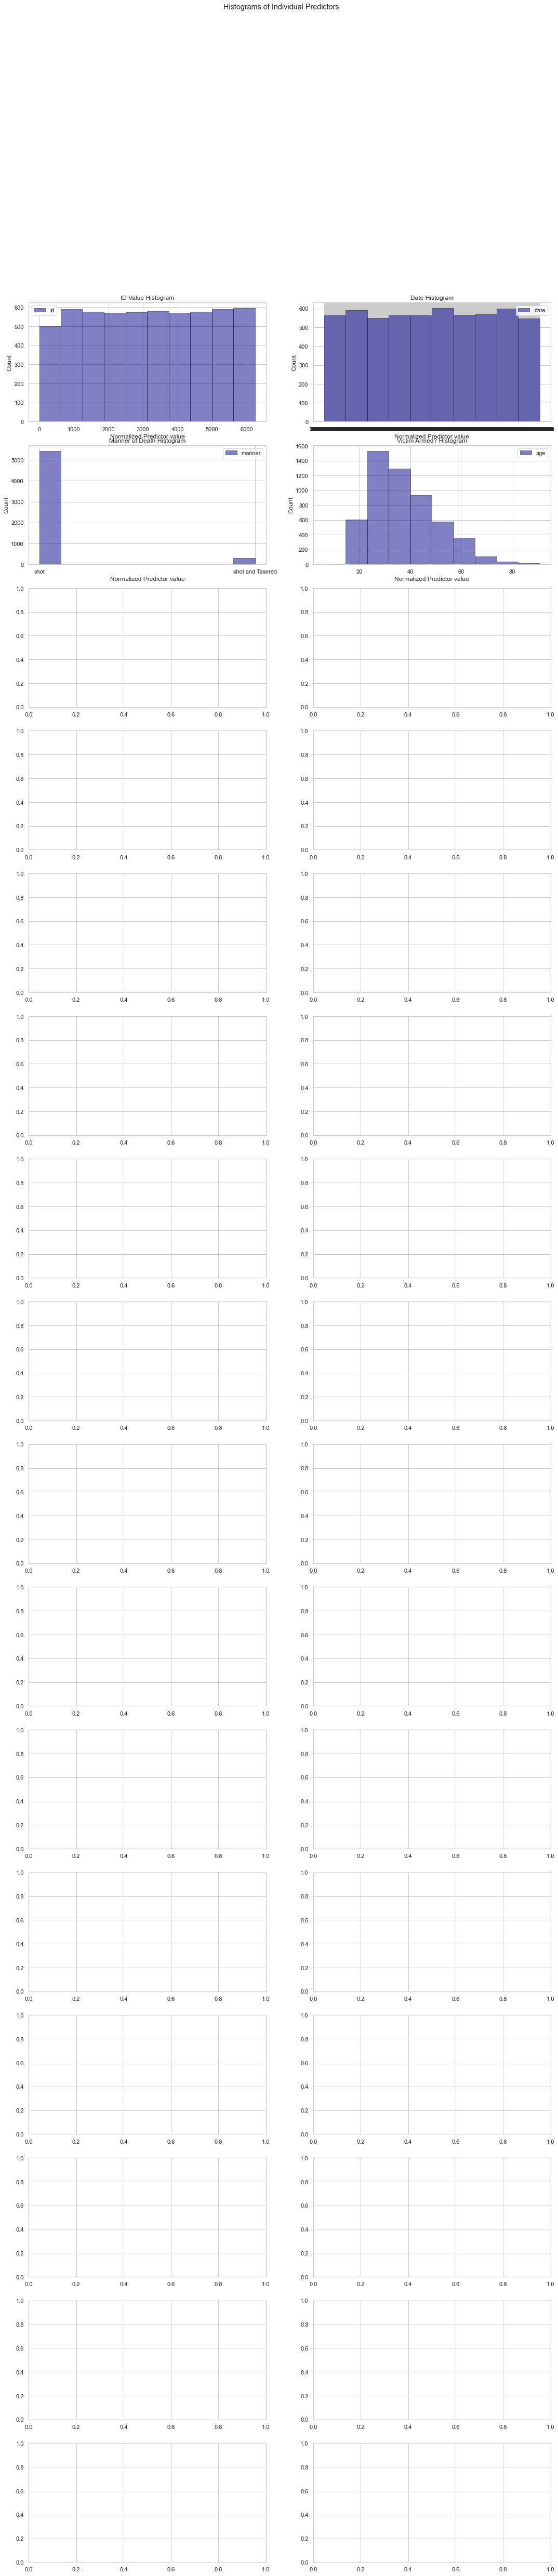

In [48]:
# your code here

#for col in data_wapo.columns:
#    data_wapo.loc[data_wapo[col]].hist(column=col, bins='auto')

# check Training Data with histogram
fig, axs = plt.subplots(len(df2.columns), 2, figsize=(18,80))
fig.suptitle('Histograms of Individual Predictors')


axs[0,0].hist(df2['id'], alpha = 0.5, edgecolor='k', label='id', color='darkblue')
axs[0,0].set_xlabel('Normalized Predictor value')
axs[0,0].set_ylabel('Count')
axs[0,0].set_title(f'ID Value Histogram')
axs[0,0].legend(loc = 'best')

axs[0,1].hist(df2['date'], alpha = 0.5, edgecolor='k', label='date', color='darkblue')
axs[0,1].set_xlabel('Normalized Predictor value')
axs[0,1].set_ylabel('Count')
axs[0,1].set_title(f'Date Histogram')
axs[0,1].legend(loc = 'best')

axs[1,0].hist(df2['manner_of_death'], alpha = 0.5, edgecolor='k', label='manner', color='darkblue')
axs[1,0].set_xlabel('Normalized Predictor value')
axs[1,0].set_ylabel('Count')
axs[1,0].set_title(f'Manner of Death Histogram')
axs[1,0].legend(loc = 'best')

axs[1,1].hist(df2['age'], alpha = 0.5, edgecolor='k', label='age', color='darkblue')
axs[1,1].set_xlabel('Normalized Predictor value')
axs[1,1].set_ylabel('Count')
axs[1,1].set_title(f'Victim Armed? Histogram')
axs[1,1].legend(loc = 'best')

*Result*


id
date
manner_of_death
armed
age
gender
race
city
state
signs_of_mental_illness
threat_level
flee
body_camera
longitude
latitude
is_geocoding_exact


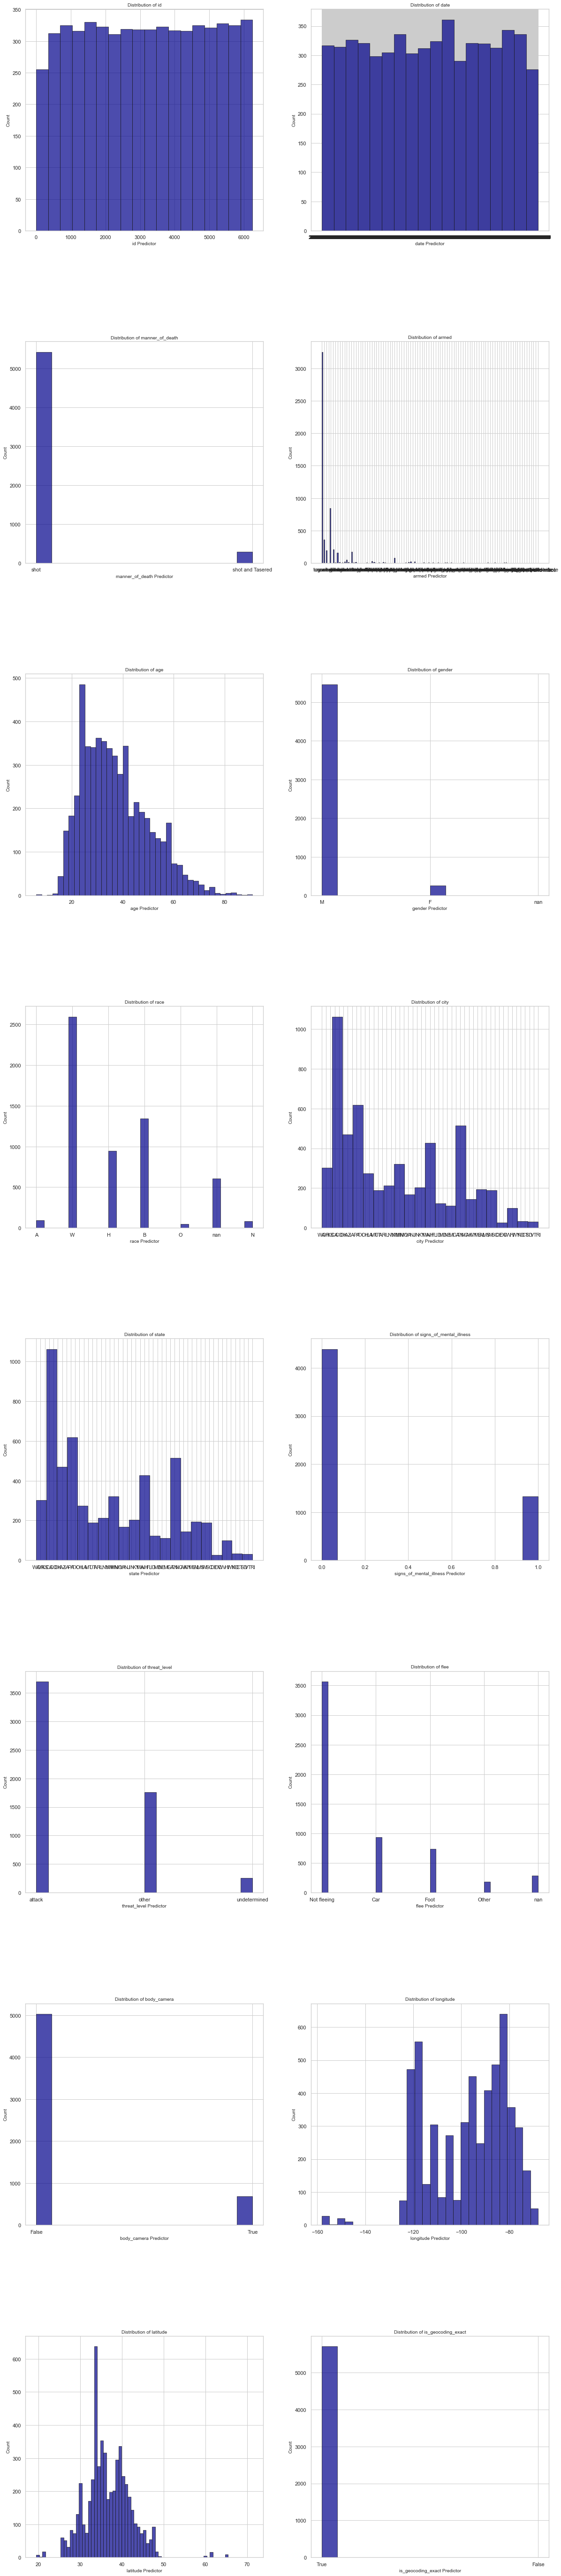

In [61]:
# check Data with histogram

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 100), edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
fontsize = 10

columns = df2.columns
# columns = ["Victim's name", "Victim's age", "Victim's gender", "Victim's race", "Date of Incident (month/day/year)",
#           "Street Address of Incident", "City", "State", "Zipcode", "County", "Agency responsible for death", 
#           "ORI Agency Identifier (if available)", "Cause of death", 
#           "Official disposition of death (justified or other)", "Criminal Charges?", 
#           "Symptoms of mental illness?", "Unarmed/Did Not Have an Actual Weapon", 
#           "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)", 
#           "Alleged Threat Level (Source: WaPo)", "Fleeing (Source: WaPo)", "Body Camera (Source: WaPo)", 
#           "Off-Duty Killing?", "Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )", 
#           "MPV ID", "Fatal Encounters ID"]

# plot histograms
for i, col in enumerate(columns):
    print(col)
    axs[i].hist(df2[col], alpha=0.7, color='darkblue', bins='auto', density=False, histtype = 'bar', edgecolor='k')
    axs[i].set_title("Distribution of " + col, fontsize=fontsize)
    axs[i].set_xlabel(col + " Predictor", fontsize=fontsize)
    axs[i].set_ylabel('Count', fontsize=fontsize)
    
# removes the empty one, since we only have 14 flavors, not 15
#axs[28].set_axis_off()
#axs[29].set_axis_off()

plt.show()

*Your answer here*  



*Your answer here*  


*Your answer here*  



### <div class='exercise'><b>Section 3: Make some Plots!</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>

In [ ]:
# your code here

# Plot Incidents over time

X = df2['date']
y = np.arange(len(df2['id']))
 

fig = plt.figure(figsize=(15,10))
plt.plot(X, y, 'o-', color='g', label="WaPo")
plt.title('Count of Violent Incidents over Time')
plt.xlabel('Date')
plt.ylabel('Cumulitive Incidents [count]')
#plt.ylim(60,100)
#plt.xticks(X, components)
#plt.yticks(range(1, len(X), 100))
#plt.xticks(np.arange(min(y), max(y), 100))
plt.legend()
plt.show()

In [ ]:
# your code here


In [ ]:
# your code here


*Your answer here*  


In [ ]:
# your code here



*Your answer here*  


In [ ]:
# your code here



In [ ]:
# your code here



In [ ]:
# your code here


*Your answer here*  


The

*Your answer here*  


### <div class='exercise'><b>Section 4: Initial Look at Models</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>



In [ ]:
# your code here



In [ ]:
# your code here



In [ ]:
# your code here


In [ ]:
# your code here


*Your answer here*  


In [ ]:
# your code here


*Your answer here*  


### <div class='exercise'><b>Section 5: Appendix</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>

</div>


*Your answer here*  



*Your answer here*  


*Your answer here*  


*Your answer here*  


*Your answer here*  


### End of Notebook